In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import cv2

(480, 800, 3)


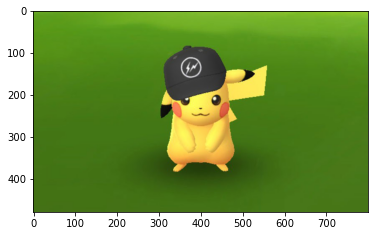

In [2]:
img = cv2.imread('pikachu.jpg') #Reads the image in BGR format so we need to convert it in RGB to view original image.
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
original_shape = img.shape
print(original_shape)
plt.imshow(img)
plt.show()

#### Flatten each channel of the image
 - To apply K-Means clustering to an image we need to convert this 3-Dimensional image to  a 2-Dimensional image.

In [3]:
flat_pixels = img.reshape((-1,3)) # it converts all the image channels into a linear array (720*1280 = 921600)
print(flat_pixels.shape)

(384000, 3)


In [4]:
from sklearn.cluster import KMeans

In [12]:
# Suppose, we want five dominant colours
dom_colors = 5
kmeans = KMeans(n_clusters=dom_colors)
kmeans.fit(flat_pixels)

KMeans(n_clusters=5)

In [6]:
centers=kmeans.cluster_centers_

In [7]:
centers = np.array(centers,dtype='uint8')
print(centers) #Each center represents a colour

[[ 68 117  21]
 [242 204  82]
 [116 175  40]
 [ 84 144  25]
 [ 52  63  38]]


###### Plotting and trying to identify all these colours

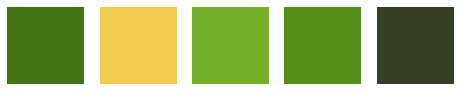

In [15]:
i = 1
plt.figure(0,figsize=(8,4))

colors = []
for each_color in centers:
    plt.subplot(1,5,i)
    plt.axis("off")
    i+=1
    
    colors.append(each_color)
    
    # Color swatch
    a = np.zeros((100,100,3),dtype='uint8')
    a[:,:,:] = each_color
    plt.imshow(a)

plt.show()

### Segmenting our original image

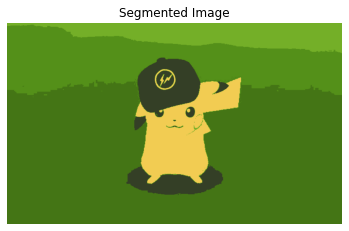

In [9]:
img2show = centers[kmeans.labels_]
segmented_img = img2show.reshape(original_shape)
plt.imshow(segmented_img)
plt.title("Segmented Image")
plt.axis("off")
plt.show()

### Plotting original and segmented images together

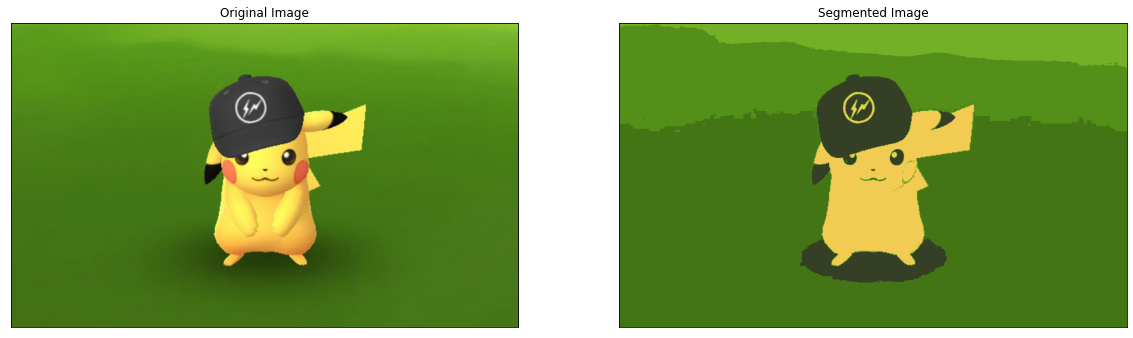

In [10]:
fig = plt.figure(figsize=(20, 15))
# Plotting Original Image
ax1 = fig.add_subplot(1, 2, 1)
ax1.set_title("Original Image")
ax1.set_xticks([])
ax1.set_yticks([])
ax1.imshow(img)
# Plotting Segmented Image
ax2 = fig.add_subplot(1, 2, 2)
ax2.set_title("Segmented Image")
ax2.set_xticks([])
ax2.set_yticks([])
ax2.imshow(segmented_img)
plt.show()